<a href="https://colab.research.google.com/github/ccarpenterg/LearningTensorFlow2.0/blob/master/Gettingstarted_TensorFlow2_0_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIFAR-10: A More Challenging Dataset for CNNs



In [0]:
!pip install tensorflow==2.0.0-alpha0

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

print(tf.__version__)

2.0.0-alpha0


In [0]:
cifar10 = datasets.cifar10

(cifar10x_train, cifar10y_train), (cifar10x_test, cifar10y_test) = cifar10.load_data()

In [5]:
print(cifar10x_train.shape)
print(cifar10y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [6]:
print(cifar10x_test.shape)
print(cifar10y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(cifar10x_train,
                    cifar10y_train,
                    epochs=15,
                    validation_data=(cifar10x_test, cifar10y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.6950 - accuracy: 0.4108 - val_loss: 1.3390 - val_accuracy: 0.5242
Epoch 2/15
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.2461 - accuracy: 0.5612 - val_loss: 1.2849 - val_accuracy: 0.5540
Epoch 3/15
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.0944 - accuracy: 0.6200 - val_loss: 1.0916 - val_accuracy: 0.6259
Epoch 4/15
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.9994 - accuracy: 0.6525 - val_loss: 1.0464 - val_accuracy: 0.6439
Epoch 5/15
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.9263 - accuracy: 0.6795 - val_loss: 1.0132 - val_accuracy: 0.6547
Epoch 6/15
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.8655 - accuracy: 0.6995 - val_loss: 1.0408 - val_accuracy: 0.6532
Epoch 7/15
50000/50000 [==============================] 

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

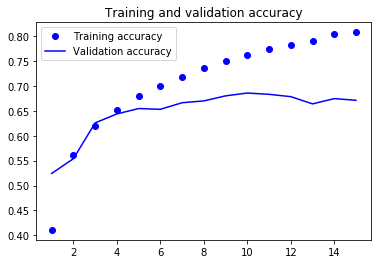

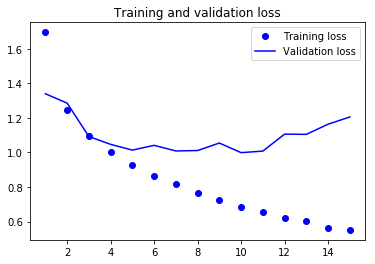

In [15]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()